# Î™®Îìà Î∂àÎü¨Ïò§Í∏∞

In [1]:
# import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Í∑∏ÎûòÌîÑ ÌïúÍ∏Ä Íπ®Ïßê
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

#warning Î©îÏãúÏßÄ Î¨¥Ïãú
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore")

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [3]:
df = pd.read_csv("./mail.csv")
df.head(5)

Î≥¥ÎÇ∏Ïù¥                             Î©îÏùºÏ£ºÏÜå  \
0    ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à  series_noreply@webtoonscorp.com   
1  " ÌòÑÍ∏àÏù¥Î≤§Ìä∏ "               nbadmin2@imga1.com   
2    ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à  series_noreply@webtoonscorp.com   
3    ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à  series_noreply@webtoonscorp.com   
4    ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à  series_noreply@webtoonscorp.com   

                                            Ï†úÎ™©  \
0  [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÌûàÎì† ÌäπÏÑ± 13Í∞ú ...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.   
1        (Í¥ëÍ≥†) ÏïäÎ∞îÍæ∏Î©¥ ÏÜêÌï¥! Ïù∏ÌÑ∞ÎÑ∑ Î≥ÄÍ≤ΩÌïòÍ≥† ÌòÑÍ∏à 47ÎßåÏõê Î∞õÏïÑÍ∞ÄÏÑ∏Ïöî~   
2  [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÏïÑÏπ¥Îç∞ÎØ∏ Ìé∏ÏùòÏ†êÏúºÎ°ú...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.   
3  [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÎÇò ÌòºÏûê ÌÉëÏóêÏÑú ÎÜç...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.   
4  [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'Î©∏Îßù ÏòàÏ†ïÏù∏ ÏïÑÏπ¥Îç∞...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.   

                                                  ÎÇ¥Ïö©  Ïä§Ìå∏Ïó¨Î∂Ä  
0                                                NaN     1  
1  <table width="100%" border="0" cellspacing="0"...     0  
2                                                NaN     1  
3                                                NaN     1  
4                                                NaN     1

# Ï†ÑÏ≤òÎ¶¨

In [4]:
df = df.dropna(subset=["Ï†úÎ™©"])
# nullÍ∞íÏù¥ ÏûàÏúºÎ©¥ Ï†úÎåÄÎ°ú Îêú ÏòàÏ∏°Ïù¥ ÏïàÎÇòÏò§Îãà nullÍ∞íÏùÑ Ï†úÍ±∞

## ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†Ï†ï

In [5]:
# Ï†úÎ™©Í≥º Ïä§Ìå∏Ïó¨Î∂ÄÎßåÏùÑ Ïù¥Ïö©Ìï¥ ÏòàÏ∏°
notnull_df = df.loc[:,["Ïä§Ìå∏Ïó¨Î∂Ä","Ï†úÎ™©"]]

In [6]:
notnull_df

Ïä§Ìå∏Ïó¨Î∂Ä                                                 Ï†úÎ™©
0       1        [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÌûàÎì† ÌäπÏÑ± 13Í∞ú ...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.
1       0              (Í¥ëÍ≥†) ÏïäÎ∞îÍæ∏Î©¥ ÏÜêÌï¥! Ïù∏ÌÑ∞ÎÑ∑ Î≥ÄÍ≤ΩÌïòÍ≥† ÌòÑÍ∏à 47ÎßåÏõê Î∞õÏïÑÍ∞ÄÏÑ∏Ïöî~
2       1        [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÏïÑÏπ¥Îç∞ÎØ∏ Ìé∏ÏùòÏ†êÏúºÎ°ú...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.
3       1        [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'ÎÇò ÌòºÏûê ÌÉëÏóêÏÑú ÎÜç...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.
4       1        [ÎÑ§Ïù¥Î≤Ñ ÏãúÎ¶¨Ï¶à] 'Î©∏Îßù ÏòàÏ†ïÏù∏ ÏïÑÏπ¥Îç∞...'Ïùò Íµ¨Îß§ ÎÇ¥Ïó≠ÏùÑ ÏïàÎÇ¥Ìï¥ ÎìúÎ¶ΩÎãàÎã§.
..    ...                                                ...
178     0                              ÌïúÍµ≠ TwitchÏóê ÎåÄÌïú Ï£ºÏöî Í≥µÏßÄÏÇ¨Ìï≠
179     1                            YouTube Premium Í∞ÄÍ≤© ÏóÖÎç∞Ïù¥Ìä∏
180     0                                          ÏïàÎÖï, ÎßàÌÖåÏò§ üëã
181     1                                              Î≥¥Ïïà ÏïåÎ¶º
182     0  [ÏôÄÎîîÏ¶à] [10ÎßåÏõêÎåÄ ÏÜåÍ∞ÄÏ£Ω ÏàòÏ†úÌôî] Ï¥àÍ≤ΩÎüâ ÌÇ§ÎÜíÏù¥+5.5cm ÏßÅÏû•Ïù∏ ÎçîÎπÑÏäàÏ¶à ÌîÑ...

[182 rows x 2 columns]

In [7]:
notnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ïä§Ìå∏Ïó¨Î∂Ä    182 non-null    int64 
 1   Ï†úÎ™©      182 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [8]:
notnull_df.shape

(182, 2)

In [9]:
print('Ï†úÎ™©Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í :',notnull_df['Ï†úÎ™©'].nunique())
# 182Í∞úÏ§ë Ïú†ÎãàÌÅ¨Ìïú Í∞íÏù¥ 133Í∞úÎùºÎäî Í≤ÉÏùÄ 49Í∞úÏùò Ï§ëÎ≥µÍ∞íÏù¥ Ï°¥Ïû¨ÌïúÎã§Îäî ÏùòÎØ∏

Ï†úÎ™©Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í : 133


In [10]:
# Ï§ëÎ≥µ Í∞íÎì§ÏùÑ Ï†úÍ±∞
notnull_df.drop_duplicates(subset=['Ï†úÎ™©'], inplace=True)
print('Ï¥ù ÏÉòÌîåÏùò Ïàò :',len(notnull_df))

Ï¥ù ÏÉòÌîåÏùò Ïàò : 133


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


Ï†ïÏÉÅ Î©îÏùºÍ≥º Ïä§Ìå∏ Î©îÏùºÏùò Í∞úÏàò
   Ïä§Ìå∏Ïó¨Î∂Ä  count
0     0     90
1     1     43


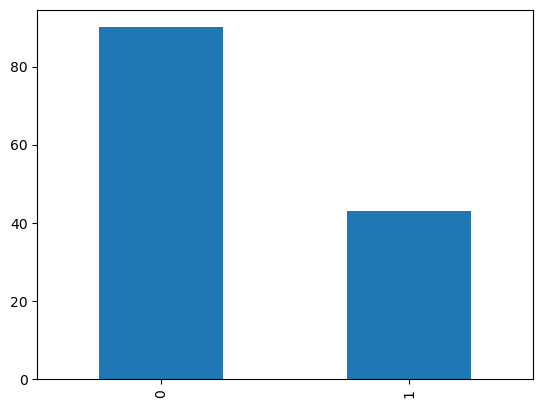

In [11]:
notnull_df['Ïä§Ìå∏Ïó¨Î∂Ä'].value_counts().plot(kind='bar')
print('Ï†ïÏÉÅ Î©îÏùºÍ≥º Ïä§Ìå∏ Î©îÏùºÏùò Í∞úÏàò')
print(notnull_df.groupby('Ïä§Ìå∏Ïó¨Î∂Ä').size().reset_index(name='count'))
# Ïä§Ìå∏ 90Í±¥, ÏùºÎ∞ò Î©îÏùº 43Í±¥
# Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàòÎèÑ Ï†ÅÏßÄÎßå, ÎåÄÎ∂ÄÎ∂ÑÏù¥ Ïä§Ìå∏ Î©îÏùºÏù¥Îã§.

In [12]:
print(f'Ïä§Ìå∏ Î©îÏùºÏùò ÎπÑÏú® = {round(notnull_df["Ïä§Ìå∏Ïó¨Î∂Ä"].value_counts()[0]/len(notnull_df) * 100,2)}%')
print(f'Ï†ïÏÉÅ Î©îÏùºÏùò ÎπÑÏú® = {round(notnull_df["Ïä§Ìå∏Ïó¨Î∂Ä"].value_counts()[1]/len(notnull_df) * 100,2)}%')

Ïä§Ìå∏ Î©îÏùºÏùò ÎπÑÏú® = 67.67%
Ï†ïÏÉÅ Î©îÏùºÏùò ÎπÑÏú® = 32.33%


In [13]:
X_data = notnull_df['Ï†úÎ™©']
y_data = notnull_df['Ïä§Ìå∏Ïó¨Î∂Ä']
# ÌïôÏäµÎåÄÏÉÅÍ≥º Ï†ïÎãµÏùÑ Î∂ÑÎ¶¨

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
# stratify : train,testÏóê Ïä§Ìå∏Ïù¥ Í≥ºÎã§ÌïòÍ≤å Îì§Ïñ¥Í∞ÄÏÑú ÏùºÎ∞ò Î©îÏùºÏù¥ ÏóÜÍ±∞ÎÇò, Î™®Îì† ÏùºÎ∞ò Î©îÏùºÏù¥ Îì§Ïñ¥Í∞ÄÎäî Í≤ΩÏö∞Î•º ÏóÜÍ≤åÌïúÎã§.

In [15]:
# ÌÜ†ÌÅ∞ÌôîÏôÄ Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏàòÌñâ
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[27, 98, 99, 100, 12, 101, 28], [1, 29, 30, 14, 9], [102, 103, 104, 105, 106, 107], [1, 18, 19, 108, 109, 110, 31, 20], [1, 111, 112, 113, 32, 114, 115]]


In [16]:
# Ïñ¥Îñ§ Îã®Ïñ¥Ïóê Ïñ¥Îñ§ Ï†ïÏàòÍ∞Ä Îß§Ïπ≠ ÎêòÏóàÎäîÏßÄ Î°πÏù∏
word_to_index = tokenizer.word_index
print(word_to_index)

{'Í¥ëÍ≥†': 1, 'ÎìúÎ¶ΩÎãàÎã§': 2, 'ÎÑ§Ïù¥Î≤Ñ': 3, 'Íµ¨Îß§': 4, 'ÎÇ¥Ïó≠ÏùÑ': 5, 'ÏïàÎÇ¥Ìï¥': 6, 'ÏïàÎÇ¥': 7, "'Ïùò": 8, 'Ìï†Ïù∏': 9, 'ÏãúÎ¶¨Ï¶à': 10, 'ÏõπÌà∞': 11, 'Î∞è': 12, '11': 13, '45': 14, '2024': 15, "sara's": 16, 'pick': 17, 'dacon': 18, 'Îç∞Ïù¥Ïä§Ïø®': 19, 'Ïò§Ìîà': 20, 'ÏïåÎ¶º': 21, 'Î™®Ïßë': 22, 'ÏúÑÌïú': 23, 'ÏµúÏ¥à': 24, 'ÏãúÏûë': 25, 'Í∞úÏù∏Ï†ïÎ≥¥': 26, 'Ï£º': 27, 'Í∞úÏ†ï': 28, 'ÏÇ¨Ïù¥Î≤Ñ': 29, 'Î®ºÎç∞Ïù¥': 30, 'ÏòàÏ∏°': 31, 'Ïò®ÎùºÏù∏': 32, 'ÎπÑÎ∞ÄÎ≤àÌò∏': 33, 'Îç∞Ïù¥ÏΩò': 34, 'ai': 35, 'Í≤ΩÏßÑÎåÄÌöå': 36, 'ipv4': 37, 'ÎåÄÌïú': 38, 'ÏÉàÎ°úÏö¥': 39, 'for': 40, '1': 41, 'ÎÇ¥Ïó≠': 42, 'Í¥ëÍµ∞Ï†ú': 43, '50': 44, 'on': 45, 'ÎêòÏóàÏäµÎãàÎã§': 46, 'ÏôÄÎîîÏ¶à': 47, '10ÎßåÏõêÎåÄ': 48, 'ÏÜåÍ∞ÄÏ£Ω': 49, 'ÏàòÏ†úÌôî': 50, 'Ï¥àÍ≤ΩÎüâ': 51, 'ÌÇ§ÎÜíÏù¥': 52, '5': 53, '5cm': 54, 'ÏßÅÏû•Ïù∏': 55, 'ÎçîÎπÑÏäàÏ¶à': 56, 'ÌîÑÎ°úÏ†ùÌä∏': 57, 'ÏÉàÏÜåÏãù': 58, '‚ùó': 59, 'Ïàò': 60, 'Ï∞∏Í∞Ä': 61, 'Ï†ëÏàòÏôÑÎ£å': 62, 'Í¥ëÍ≥†ÏÑ±': 63, 'Î∞±ÏäπÏàòÎãòÏùò': 64, 'Í∞§Îü≠Ïãúz': 65, 'flip5': 66, 'ÌôïÏù∏ÌïòÏÑ∏

In [17]:
threshold = 2
total_cnt = len(word_to_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©(vocabulary)ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îì±Ïû• ÎπàÎèÑÍ∞Ä 1Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 473
Îã®Ïñ¥ ÏßëÌï©(vocabulary)ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 82.98245614035088
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 59.27318295739349


In [18]:
# Îì±Ïû•ÎπàÎèÑÍ∞Ä 1ÌöåÏù∏ Ìù¨Í∑ÄÎã®Ïñ¥Ïùò Îì±Ïû• ÌôïÎ•†Ïù¥ 82%ÎÇò Îê©ÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî Í∑∏Î†áÏßÄ ÏïäÏßÄÎßå, Ìù¨Í∑ÄÎã®Ïñ¥Ïùò Îì±Ïû•ÌôïÎ•†Ïù¥ ÎÑàÎ¨¥ ÎÇÆÎã§Î©¥ thresholdÏùò ÏàòÎ•º Î≥ÄÍ≤ΩÌïòÏó¨ Ï°∞Ï†àÍ∞ÄÎä•Ìï©ÎãàÎã§.

In [19]:
vocab_size = len(word_to_index) + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞: {}'.format((vocab_size)))

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞: 571


Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 28
Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 7.528302


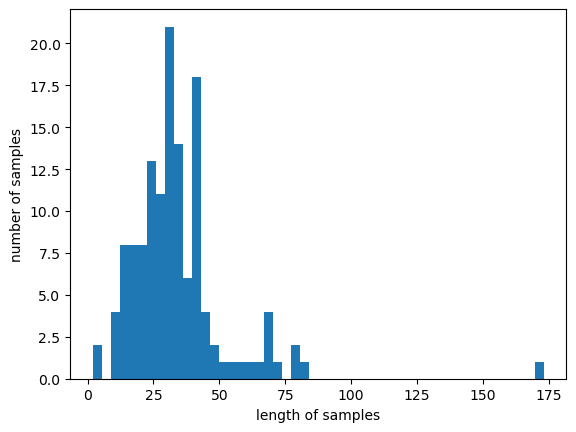

In [20]:
print('Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : %d' % max(len(sample) for sample in X_train_encoded))
print('Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
max_len = 28
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape):", X_train_padded.shape)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape): (106, 28)


# RNNÏúºÎ°ú Ïä§Ìå∏ Î©îÏùº Î∂ÑÎ•òÌïòÍ∏∞

In [22]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [23]:
embedding_dim = 32
hidden_units = 32

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
2/2 [==============================] - 1s 259ms/step - loss: 0.7186 - acc: 0.4167 - val_loss: 0.6203 - val_acc: 0.7727
Epoch 2/4
2/2 [==============================] - 0s 52ms/step - loss: 0.6101 - acc: 0.6667 - val_loss: 0.6191 - val_acc: 0.8182
Epoch 3/4
2/2 [==============================] - 0s 36ms/step - loss: 0.5622 - acc: 0.7381 - val_loss: 0.5895 - val_acc: 0.8182
Epoch 4/4
2/2 [==============================] - 0s 34ms/step - loss: 0.5121 - acc: 0.7619 - val_loss: 0.6036 - val_acc: 0.8182


In [25]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))
# Ï†ïÌôïÎèÑÍ∞Ä 77%Î°ú Ïì∏ÎßåÌïú Í≤É Í∞ôÏßÄÎßå, Ïï†Ï¥àÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏñ¥ÏÑú Ï∞∏Í≥†Ï†ïÎèÑÎßå Í∞ÄÎä•ÌïòÎã§Í≥† ÌåêÎã®Îê®

1/1 [==============================] - 0s 28ms/step - loss: 0.6155 - acc: 0.7778

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.7778


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


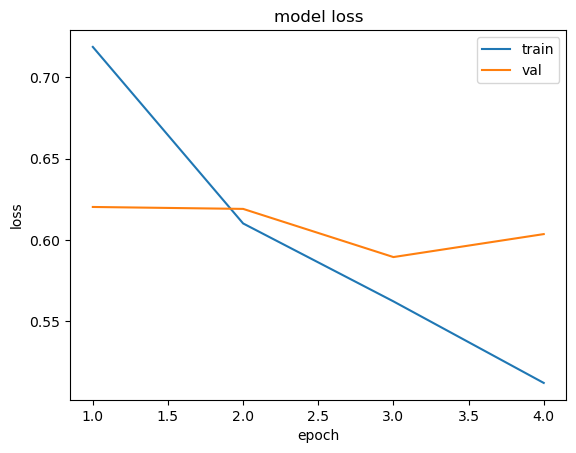

In [26]:
# ÌïôÏäµÍ≥º Í≤ÄÏ†ïÏùò Ï†ïÌôïÎèÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [27]:
# ÌïôÏäµÏùò Í≤ΩÏö∞ lossÍ∞Ä Í∞ÄÌååÎ•¥Í≤å Îñ®Ïñ¥ÏßÄÏßÄÎßå, Í≤ÄÏ¶ùÏùò Í≤ΩÏö∞ Í∑∏Î†áÍ≤å ÎßéÏù¥ Îñ®Ïñ¥ÏßÄÏßÑ ÏïäÎäîÎã§.

In [28]:
-------Î≤àÏô∏-------

SyntaxError: invalid syntax (2834429341.py, line 1)

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 1s 208ms/step - loss: 0.6918 - acc: 0.5476 - val_loss: 0.5655 - val_acc: 0.7727
Epoch 2/10
2/2 [==============================] - 0s 43ms/step - loss: 0.6107 - acc: 0.6667 - val_loss: 0.5543 - val_acc: 0.7727
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 0.5710 - acc: 0.6667 - val_loss: 0.5820 - val_acc: 0.8182
Epoch 4/10
2/2 [==============================] - 0s 61ms/step - loss: 0.5261 - acc: 0.7381 - val_loss: 0.5822 - val_acc: 0.8182
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 0.4830 - acc: 0.7857 - val_loss: 0.6347 - val_acc: 0.7273
Epoch 6/10
2/2 [==============================] - 0s 37ms/step - loss: 0.4407 - acc: 0.9405 - val_loss: 0.5654 - val_acc: 0.8182
Epoch 7/10
2/2 [==============================] - 0s 37ms/step - loss: 0.3866 - acc: 0.8810 - val_loss: 0.5881 - val_acc: 0.7273
Epoch 8/10
2/2 [==============================] - 0s 39ms/step - loss: 0.3435 - acc: 0.9286 - va

In [30]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

1/1 [==============================] - 0s 24ms/step - loss: 0.5789 - acc: 0.7778

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.7778


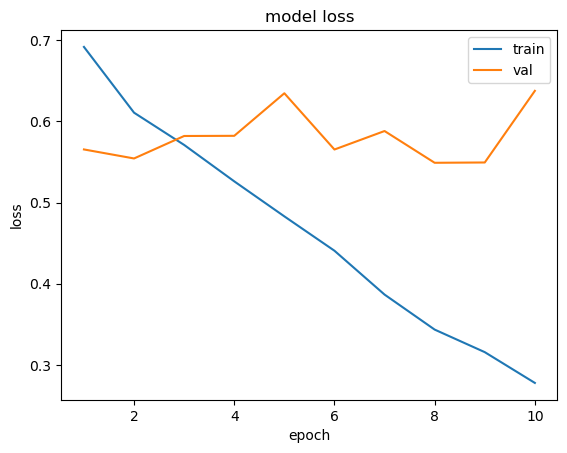

In [31]:
# ÌïôÏäµÍ≥º Í≤ÄÏ†ïÏùò Ï†ïÌôïÎèÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
# ÏóêÌè¨ÌÅ¨Í∞Ä 4Í∞Ä ÎÑòÏñ¥Í∞ÄÎ©¥ Í≤ÄÏ¶ùÏùò Í≤ΩÏö∞ Ïò§ÌûàÎ†§ lossÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.